<a href="https://colab.research.google.com/github/DevTulioDantas/Regress-o_Marketing/blob/main/Casos_Covid_OTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests pandas sqlalchemy
import pandas as pd
import requests
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"
response = requests.get(url)
with open("dados_covid_01-01-2021.csv", "wb") as f:
    f.write(response.content)
print("Arquivo baixado com sucesso!")

Arquivo baixado com sucesso!


Visualização Previa dos Dados:

In [ ]:
df = pd.read_csv("dados_covid_01-01-2021.csv")
print(df.head())

   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-02 05:22:33  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-02 05:22:33  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-02 05:22:33  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-02 05:22:33  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-02 05:22:33 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953      52513    2201      41727    8585  Afghanistan   
1  20.168300      58316    1181      33634   23501      Albania   
2   1.659600      99897    2762      67395   29740      Algeria   
3   1.521800       8117      84       7463     570      Andorra   
4  17.873900      17568     405      11146    6017       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     134.896578             4.191343  
1    2026.409062             2.025173  
2 

Guardando em um Banco de dados:

-Banco de dados escolhido: Sqlite3






-Motivo: Simplicidade e ja integrado ao Python e ao google colab.

In [ ]:
conn = sqlite3.connect("covid19.db")
df.to_sql("dados_covid", conn, if_exists="replace", index=False)
conn.close()

Consultando e testando os dados no banco de dados:


In [ ]:
conn = sqlite3.connect("covid19.db")
query = "SELECT Country_Region, SUM(Confirmed) as total_confirmed FROM dados_covid GROUP BY Country_Region"
#Para teste escolhemos uam query onde agrupamos por países e somamos os casos confirmados
df_resultado = pd.read_sql(query, conn)
print(df_resultado)
conn.close()

           Country_Region  total_confirmed
0             Afghanistan            52513
1                 Albania            58316
2                 Algeria            99897
3                 Andorra             8117
4                  Angola            17568
..                    ...              ...
195    West Bank and Gaza           139223
196  Winter Olympics 2022                0
197                 Yemen             2101
198                Zambia            20997
199              Zimbabwe            14084

[200 rows x 2 columns]


In [ ]:
#Notado na linha 196 da ultima consulta, foram cadastrados como país
#o campo Winter Olympics 2022 com nenhum resultado de covid confirmado
#vamos verificar esses dados.

# Selecionar apenas as linhas onde Country_Region é "Winter Olympics 2022"
df_winter_olympics = df[df["Country_Region"] == "Winter Olympics 2022"]

# Exibir os resultados
print(df_winter_olympics)

      FIPS Admin2 Province_State        Country_Region          Last_Update  \
4001   NaN    NaN            NaN  Winter Olympics 2022  2021-01-02 05:22:33   

          Lat     Long_  Confirmed  Deaths  Recovered  Active  \
4001  39.9042  116.4074          0       0          0       0   

              Combined_Key  Incident_Rate  Case_Fatality_Ratio  
4001  Winter Olympics 2022            0.0                  0.0  


In [ ]:
#O Campo winter Olympics é irrelevante
#Removendo o campo do DF

df = df[df["Country_Region"] != "Winter Olympics 2022"]

# Verificar se a linha foi removida
print(df["Country_Region"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

Para iniciar analise vamos organizar o top 10 países com mais casos confirmados

   Country_Region  Confirmed
0              US   20397401
1           India   10305788
2          Brazil    7703971
3          Russia    3153960
4          France    2697014
5  United Kingdom    2549671
6          Turkey    2220855
7           Italy    2129376
8           Spain    1928265
9         Germany    1721839


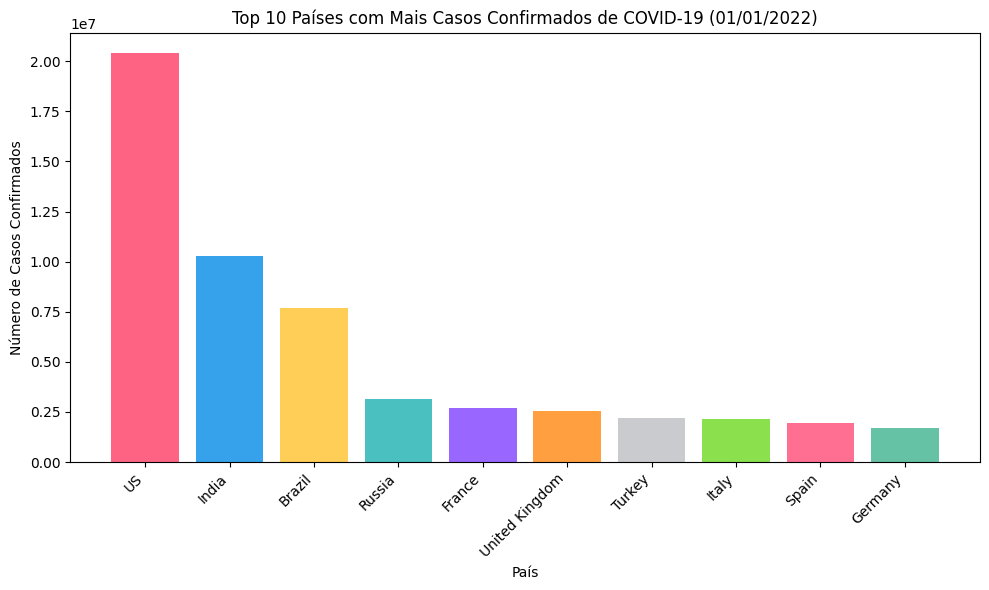

In [ ]:
top_10_cases = df.groupby("Country_Region")["Confirmed"].sum().nlargest(10).reset_index()

print(top_10_cases)

plt.figure(figsize=(10, 6))
plt.bar(top_10_cases["Country_Region"], top_10_cases["Confirmed"], color=["#FF6384", "#36A2EB", "#FFCE56", "#4BC0C0", "#9966FF", "#FF9F40", "#C9CBCF", "#8BE04E", "#FF6F91", "#66C2A5"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Países com Mais Casos Confirmados de COVID-19 (01/01/2022)")
plt.xlabel("País")
plt.ylabel("Número de Casos Confirmados")
plt.tight_layout()
plt.show()

Para o top 10 vamos incluir os valores de População para uma analise mais de taxa Casos confirmados / População

In [ ]:
#Dados de população retirados no dia 22/05/25
#dados retirado de: World Bank, United States Census Bureau (sugestão do google)


population_data = {
    "US": 340.0,           # População dos EUA: ~340.1 milhões
    "India": 1438.0,       # População da Índia: ~1.438 milhões
    "Brazil": 211.0,       # População do Brasil: ~211 milhões
    "France": 68.0,        # População da França: ~68.29 milhões
    "Germany": 83.0,       # População da Alemanha: ~83.28 milhões
    "United Kingdom": 67.0,            # População do Reino Unido: ~67 milhões
    "Russia": 145.0,       # População da Rússia: ~145 milhões
    "Turkey": 85.0,        # População da Turquia: ~85 milhões
    "Italy": 60.0,         # População da Itália: ~60 milhões
    "Spain": 47.0          # População da Espanha: ~47 milhões
}

Criando um indicador de casos confirmados a cada 1 mi de habitantes

In [ ]:
top_10_cases["Population_millions"] = top_10_cases["Country_Region"].map(population_data)
top_10_cases["Cases_per_million"] = (top_10_cases["Confirmed"] / top_10_cases["Population_millions"]).round(2)

print(top_10_cases)

   Country_Region  Confirmed  Population_millions  Cases_per_million
0              US   20397401                340.0           59992.36
1           India   10305788               1438.0            7166.75
2          Brazil    7703971                211.0           36511.71
3          Russia    3153960                145.0           21751.45
4          France    2697014                 68.0           39661.97
5  United Kingdom    2549671                 67.0           38054.79
6          Turkey    2220855                 85.0           26127.71
7           Italy    2129376                 60.0           35489.60
8           Spain    1928265                 47.0           41026.91
9         Germany    1721839                 83.0           20745.05


In [ ]:
#apos criar o indicador, vamos ordenar por ele
top_10_cases_order_cases_per_million = top_10_cases.sort_values(by="Cases_per_million", ascending=False).head(10)

print(top_10_cases_order_cases_per_million)

   Country_Region  Confirmed  Population_millions  Cases_per_million
0              US   20397401                340.0           59992.36
8           Spain    1928265                 47.0           41026.91
4          France    2697014                 68.0           39661.97
5  United Kingdom    2549671                 67.0           38054.79
2          Brazil    7703971                211.0           36511.71
7           Italy    2129376                 60.0           35489.60
6          Turkey    2220855                 85.0           26127.71
3          Russia    3153960                145.0           21751.45
9         Germany    1721839                 83.0           20745.05
1           India   10305788               1438.0            7166.75


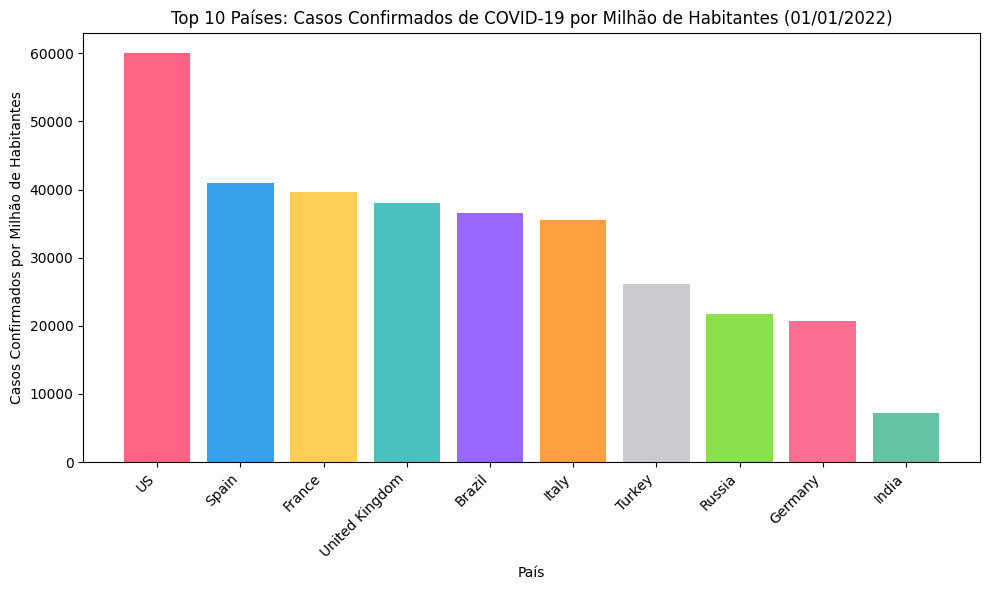

<Figure size 640x480 with 0 Axes>

In [ ]:
#Grafico em barras do top 10 casos confirmados
#configurações de cores do grafico foram definidas com auxilio de inteligencia artificial

plt.figure(figsize=(10, 6))
plt.bar(top_10_cases_order_cases_per_million["Country_Region"], top_10_cases_order_cases_per_million["Cases_per_million"],
        color=["#FF6384", "#36A2EB", "#FFCE56", "#4BC0C0", "#9966FF", "#FF9F40", "#C9CBCF", "#8BE04E", "#FF6F91", "#66C2A5"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Países: Casos Confirmados de COVID-19 por Milhão de Habitantes (01/01/2022)")
plt.xlabel("País")
plt.ylabel("Casos Confirmados por Milhão de Habitantes")
plt.tight_layout()
plt.show()
plt.savefig("top_10_cases_per_million.png")

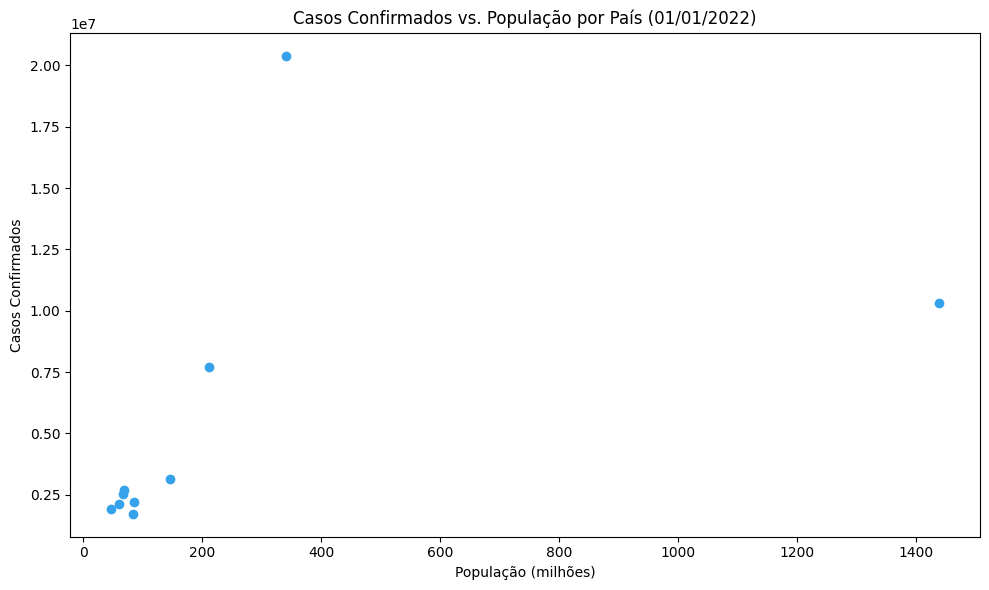

In [ ]:
#Grafico de dispersão casos confirmados no top 10 população
#podemos notar um padrão comum nos países de apoximadamente 100mi habitantes

plt.figure(figsize=(10, 6))
plt.scatter(top_10_cases["Population_millions"], top_10_cases["Confirmed"], color="#36A2EB")
plt.title("Casos Confirmados vs. População por País (01/01/2022)")
plt.xlabel("População (milhões)")
plt.ylabel("Casos Confirmados")
plt.tight_layout()
plt.show()

No Df temos também o campo de curados. Vamos fazer uma analise e Compara a eficácia de recuperação entre países

In [ ]:
df_recovery = df.groupby("Country_Region").agg({"Confirmed": "sum", "Recovered": "sum"}).reset_index()
df_recovery["Recovery_Rate"] = (df_recovery["Recovered"] / df_recovery["Confirmed"] * 100).round(2).fillna(0)

print(df_recovery)

         Country_Region  Confirmed  Recovered  Recovery_Rate
0           Afghanistan      52513      41727          79.46
1               Albania      58316      33634          57.68
2               Algeria      99897      67395          67.46
3               Andorra       8117       7463          91.94
4                Angola      17568      11146          63.44
..                  ...        ...        ...            ...
194             Vietnam       1474       1325          89.89
195  West Bank and Gaza     139223     118926          85.42
196               Yemen       2101       1396          66.44
197              Zambia      20997      18773          89.41
198            Zimbabwe      14084      11347          80.57

[199 rows x 4 columns]


In [ ]:
#orddenando por Recovery_Rate
top_10_recovery = df_recovery[df_recovery["Confirmed"] > 0].sort_values(by="Recovery_Rate", ascending=False).head(15)

print(top_10_recovery)

       Country_Region  Confirmed  Recovered  Recovery_Rate
192           Vanuatu          1          1         100.00
151             Samoa          2          2         100.00
114  Marshall Islands          4          4         100.00
159         Singapore      58629      58449          99.69
55        El Salvador      46515      45960          98.81
144             Qatar     144042     141556          98.27
50           Djibouti       5840       5735          98.20
49   Diamond Princess        712        699          98.17
64              Gabon       9571       9388          98.09
68              Ghana      54930      53758          97.87
73      Guinea-Bissau       2452       2397          97.76
154      Saudi Arabia     362878     354081          97.58
98               Laos         41         40          97.56
191        Uzbekistan      77182      75244          97.49
30         Cabo Verde      11872      11569          97.45


In [ ]:
#os 3 primeiros resultados em Recovery_Rate são países com muito pouco casos, vamos descartalos do nosso

# Pegar os 10 primeiros para identificar os 3 primeiros a descartar
top_10 = top_10_recovery.head(10)

# Pegar os 3 próximos (índices 10, 11, 12)
next_3 = top_10_recovery.iloc[10:13]

# Combinar: descartar os 3 primeiros do top 10 e adicionar os 3 próximos
final_10 = pd.concat([top_10.iloc[3:10], next_3]).drop_duplicates(subset="Country_Region").reset_index(drop=True)



print(final_10)

     Country_Region  Confirmed  Recovered  Recovery_Rate
0         Singapore      58629      58449          99.69
1       El Salvador      46515      45960          98.81
2             Qatar     144042     141556          98.27
3          Djibouti       5840       5735          98.20
4  Diamond Princess        712        699          98.17
5             Gabon       9571       9388          98.09
6             Ghana      54930      53758          97.87
7     Guinea-Bissau       2452       2397          97.76
8      Saudi Arabia     362878     354081          97.58
9              Laos         41         40          97.56


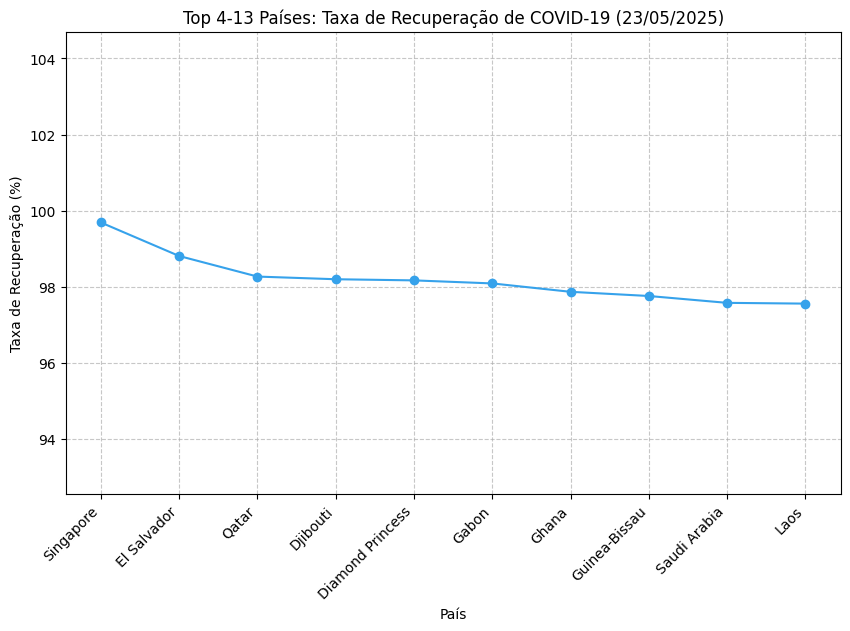

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(final_10["Country_Region"], final_10["Recovery_Rate"], marker="o", color="#36A2EB", linestyle="-")
plt.xticks(rotation=45, ha="right")
plt.title("Top 4-13 Países: Taxa de Recuperação de COVID-19 (23/05/2025)")
plt.xlabel("País")
plt.ylabel("Taxa de Recuperação (%)")
plt.ylim(min(final_10["Recovery_Rate"]) - 5, max(final_10["Recovery_Rate"]) + 5)  # Ajustar escala
plt.grid(True, linestyle="--", alpha=0.7)

<Figure size 1000x600 with 0 Axes>

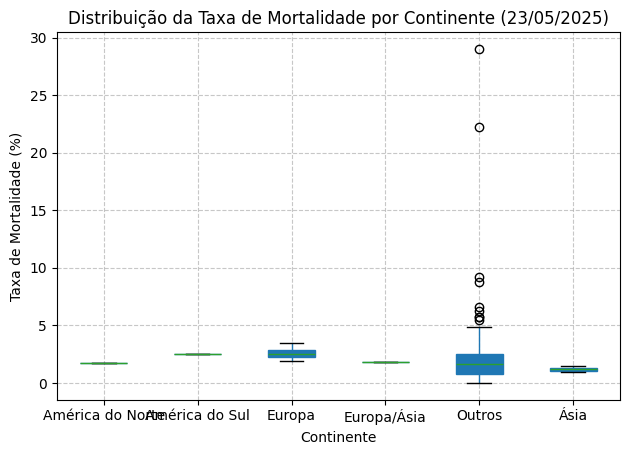

In [ ]:
# Vamos fazer um grafico de boxplot mas vamos colocar os países do top 10 casos confirmados categorizados por continente
#e o restante em uma categoria chamada outros

continent_map = {
    "US": "América do Norte", "Brazil": "América do Sul", "France": "Europa", "Germany": "Europa",
    "UK": "Europa", "Russia": "Europa/Ásia", "Turkey": "Ásia", "Italy": "Europa", "Spain": "Europa",
    "India": "Ásia"
}



df_mortality = df.groupby("Country_Region").agg({"Confirmed": "sum", "Deaths": "sum"}).reset_index()
#a criação do indicador Mortality_rate foi criado com auxilio de inteligencia artificial
df_mortality["Mortality_Rate"] = (df_mortality["Deaths"] / df_mortality["Confirmed"] * 100).round(2).fillna(0)
df_mortality["Continent"] = df_mortality["Country_Region"].map(continent_map).fillna("Outros")

# Boxplot por continente
plt.figure(figsize=(10, 6))
df_mortality.boxplot(column="Mortality_Rate", by="Continent", grid=False, patch_artist=True)
plt.title("Distribuição da Taxa de Mortalidade por Continente (23/05/2025)")
plt.suptitle("")
plt.xlabel("Continente")
plt.ylabel("Taxa de Mortalidade (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-18-fe6cece25ee7>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df_mortality.groupby("Continent", group_keys=False).apply(remove_outliers).reset_index(drop=True)


<Figure size 1000x600 with 0 Axes>

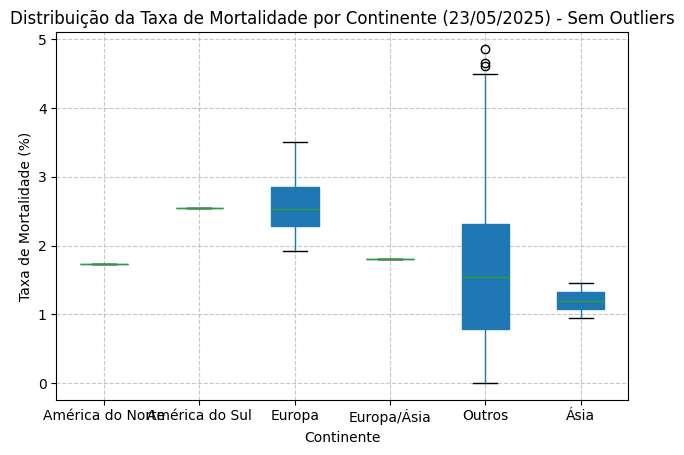

In [ ]:
#Observamos muitos outliers na categoria outros que dificulta a visualização dos outros boxplots
#vamos fazer um tratamento de outliers
#metedo remove_outliers foi cria com auxilio de inteligencia artificial
#o metodo escolhido foi o IQR que divide os resultados em quartiles e considera outliers os que estão nos primeiros e ultimos 0.25

# Função para remover outliers com base no IQR
def remove_outliers(group):
    Q1 = group["Mortality_Rate"].quantile(0.25)
    Q3 = group["Mortality_Rate"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group["Mortality_Rate"] >= lower_bound) & (group["Mortality_Rate"] <= upper_bound)]

# Aplicar o tratamento de outliers por continente
df_cleaned = df_mortality.groupby("Continent", group_keys=False).apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column="Mortality_Rate", by="Continent", grid=False, patch_artist=True)
plt.title("Distribuição da Taxa de Mortalidade por Continente (23/05/2025) - Sem Outliers")
plt.suptitle("")  # Remove o título automático
plt.xlabel("Continente")
plt.ylabel("Taxa de Mortalidade (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()